## Imports and Data

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
import seaborn as sb
import scanpy as sc
import umap as up
import scipy.stats as stats
from scib import metrics
import os
import itertools

C:\Users\49176\anaconda3\envs\sysbio_plots\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
up.__version__

'0.5.5'

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
sc.set_figure_params(figsize=(7,7),dpi=90)

In [7]:
adata= sc.read_h5ad("Data\\clean_data_full.h5ad")

## Basic Preprocessing

In [8]:
adata

AnnData object with n_obs × n_vars = 560 × 47269
    obs: 'CCLE_ID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1', 'Site_Subtype2', 'Histology', 'Hist_Subtype1', 'Hist_Subtype2', 'Gender', 'Age', 'Race', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease', 'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium', 'Freezing.Medium', 'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type', 'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code', 'adherent_or_suspension'
    var: 'n_cells', 'DeepCDR_Oncogene', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'hvg'

In [9]:
#knn-graph (not the one used for all UMAPs just a generic one)
sc.pp.neighbors(adata,30,use_rep="X")

In [10]:
#we cluster the input to get an idea how the clusters behave through the parameters
sc.tl.leiden(adata,0.6,key_added="leiden_high_dimensional")

## Test different parameters and evaluate

In [11]:
#function that performs a dimensionality reduction via UMAP 
def reduce_simple(adata,n_neighbors=15,min_dist=0.01,n_components=2,metric='euclidean',hvgs=None):
    #adata: AnnData object
    #n_neighbors: parameter k
    #min_dist: minimum distance in the embedding between datapoints
    #n_components: number of components to reduce to
    #metric: distance metric
    #hvgs: how many HVGs to subset from the Data, if None full dataset is used
    if hvgs != None:
        print(f"subsampling to {hvgs} HVGs")
        sc.pp.highly_variable_genes(adata,n_top_genes=hvgs)
        adata = adata[:,adata.var.highly_variable].copy()
    #cluster before umap on 
    sc.pp.neighbors(adata,n_neighbors,use_rep="X")
    sc.tl.leiden(adata,0.6,key_added="leiden_high_dimensional")
    #initialize reducer
    reducer_all = up.UMAP(n_neighbors=n_neighbors, n_components=n_components, metric=metric,min_dist=min_dist)
    #embed
    embedding_all =  reducer_all.fit_transform(adata.X)
    adata.obsm["X_umap_re"]=embedding_all
    #recalculate leiden on the umap embedding
    sc.pp.neighbors(adata,n_neighbors,use_rep="X_umap_re")
    sc.tl.leiden(adata,0.6,key_added="leiden_umap")
    return adata

In [12]:
sc.set_figure_params(figsize=(5,5))
sb.set_palette("pastel")

In [13]:
adata

AnnData object with n_obs × n_vars = 560 × 47269
    obs: 'CCLE_ID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1', 'Site_Subtype2', 'Histology', 'Hist_Subtype1', 'Hist_Subtype2', 'Gender', 'Age', 'Race', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease', 'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium', 'Freezing.Medium', 'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type', 'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code', 'adherent_or_suspension', 'leiden_high_dimensional'
    var: 'n_cells', 'DeepCDR_Oncogene', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'hvg', 'neighbors', 'leiden'
    obsp: 'distances', 'connectivities'

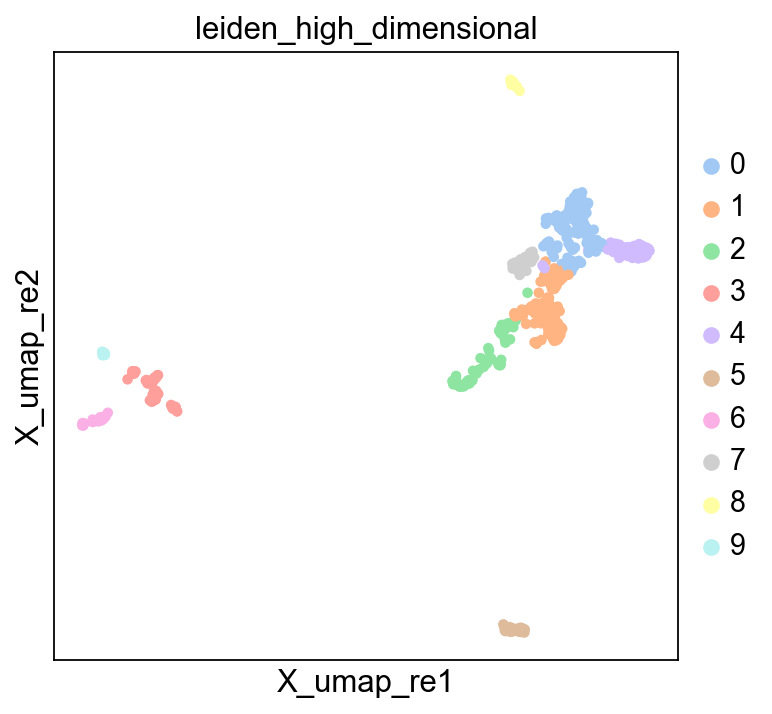

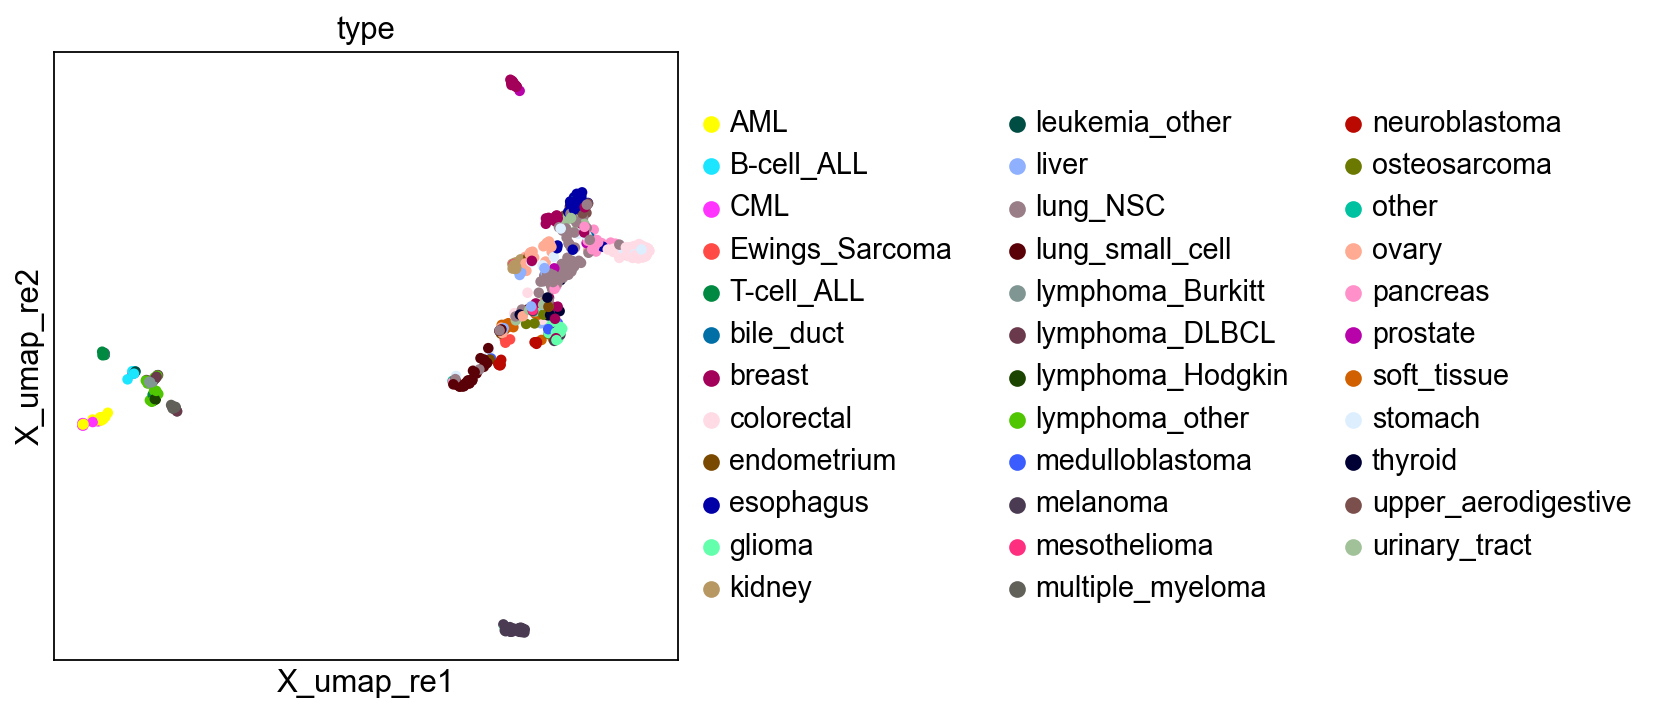

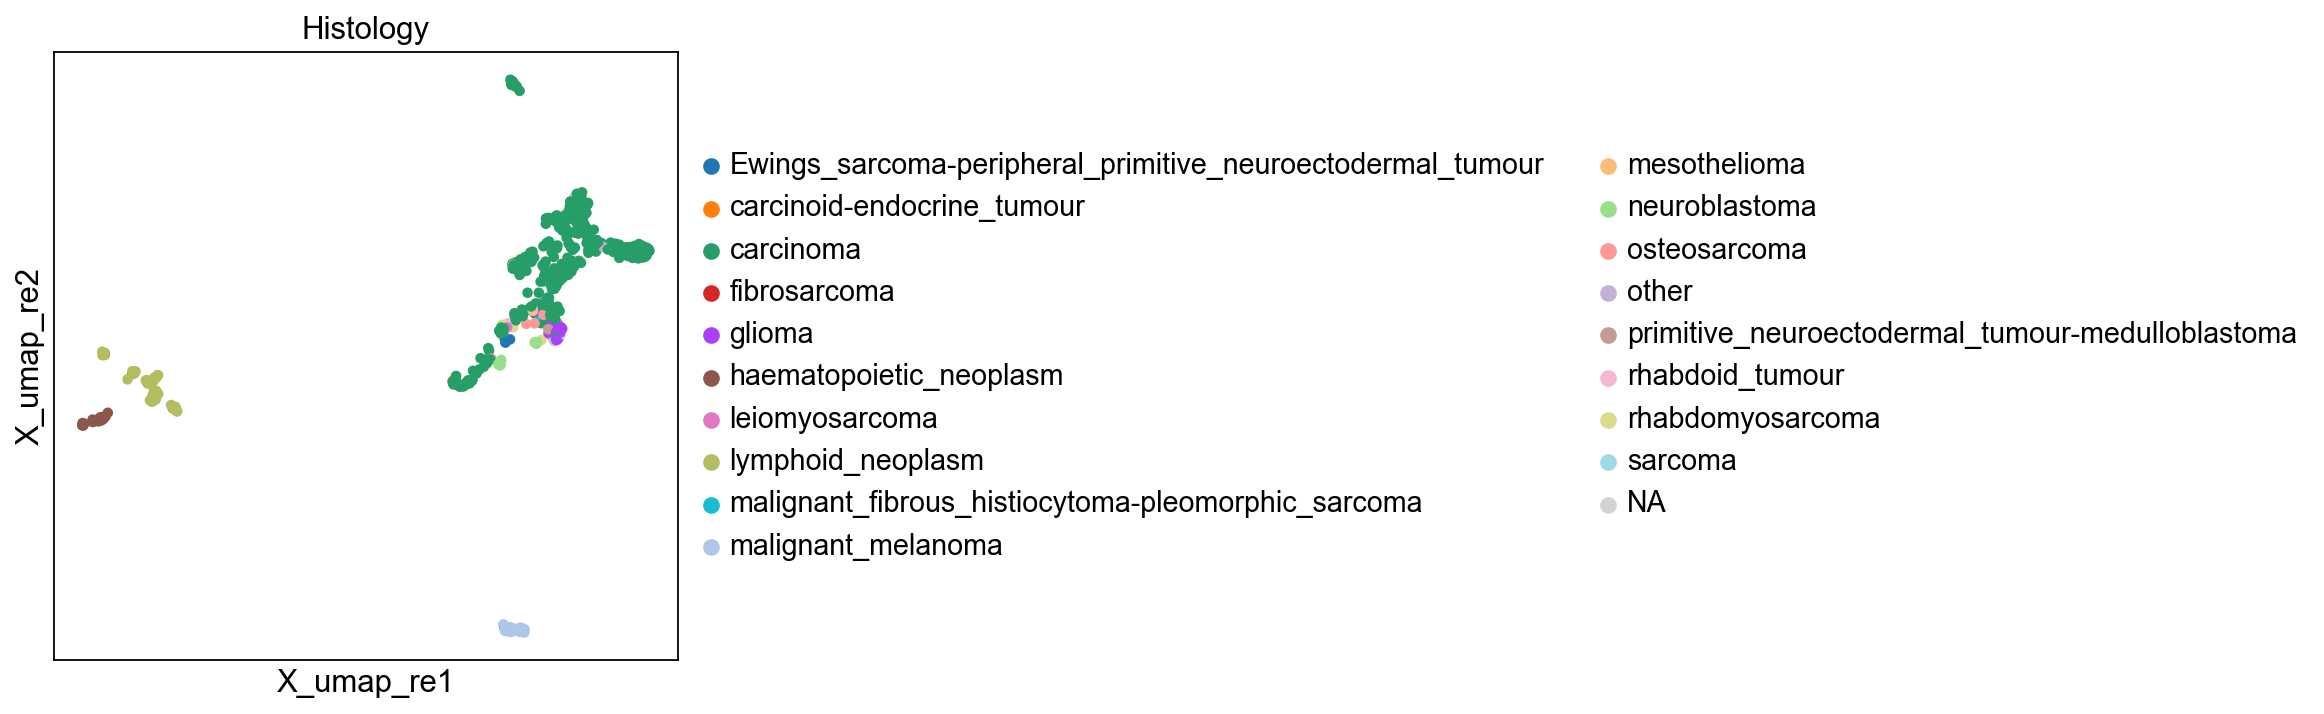

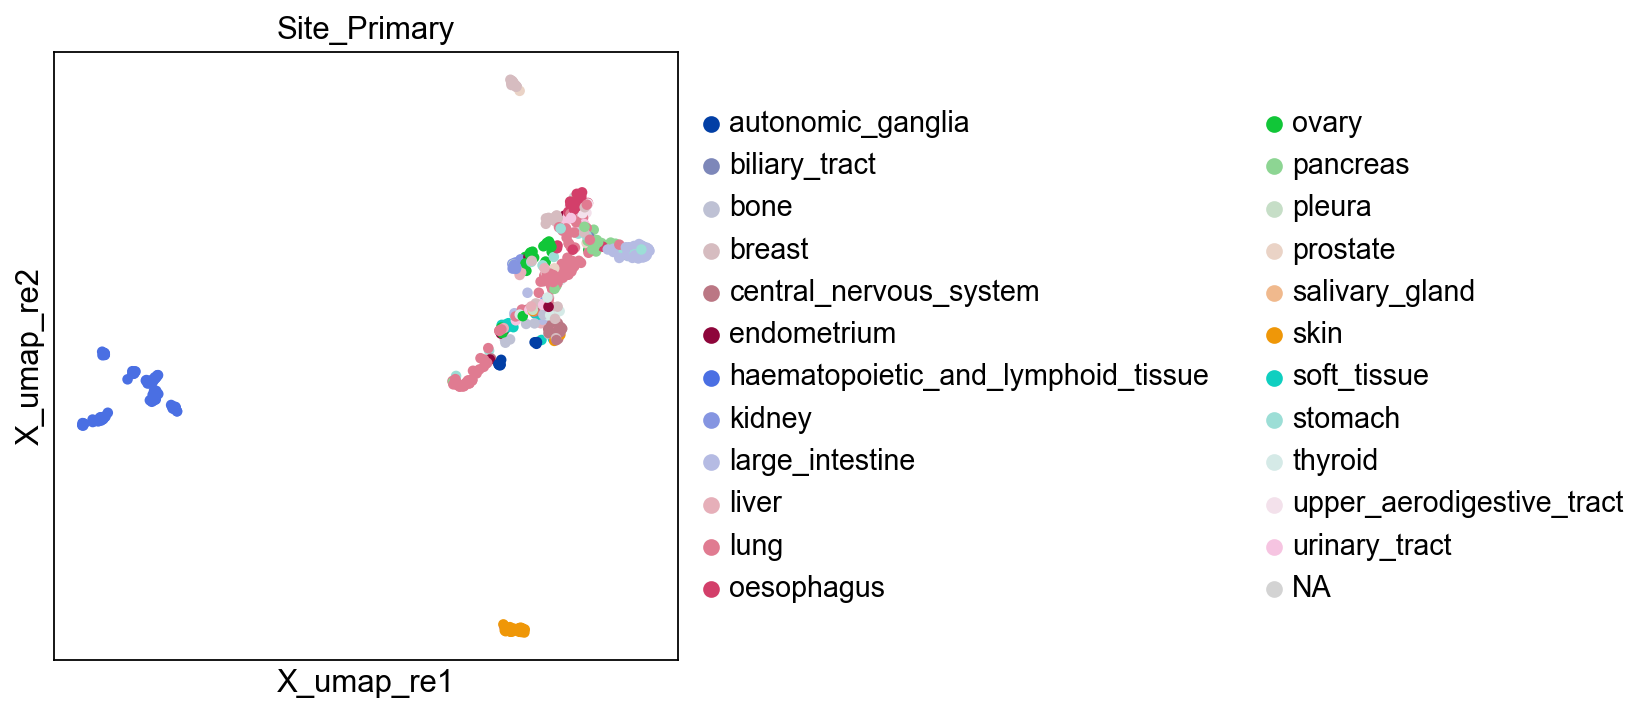

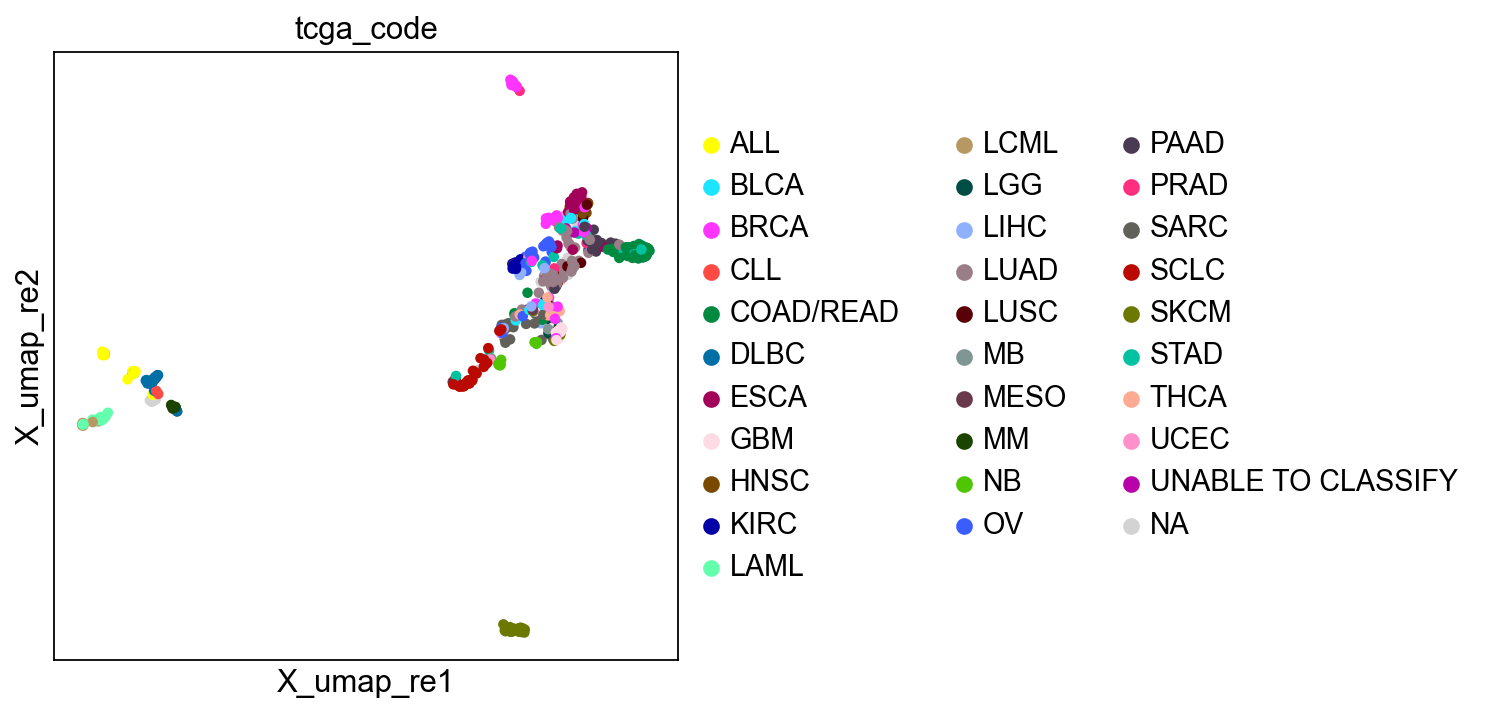

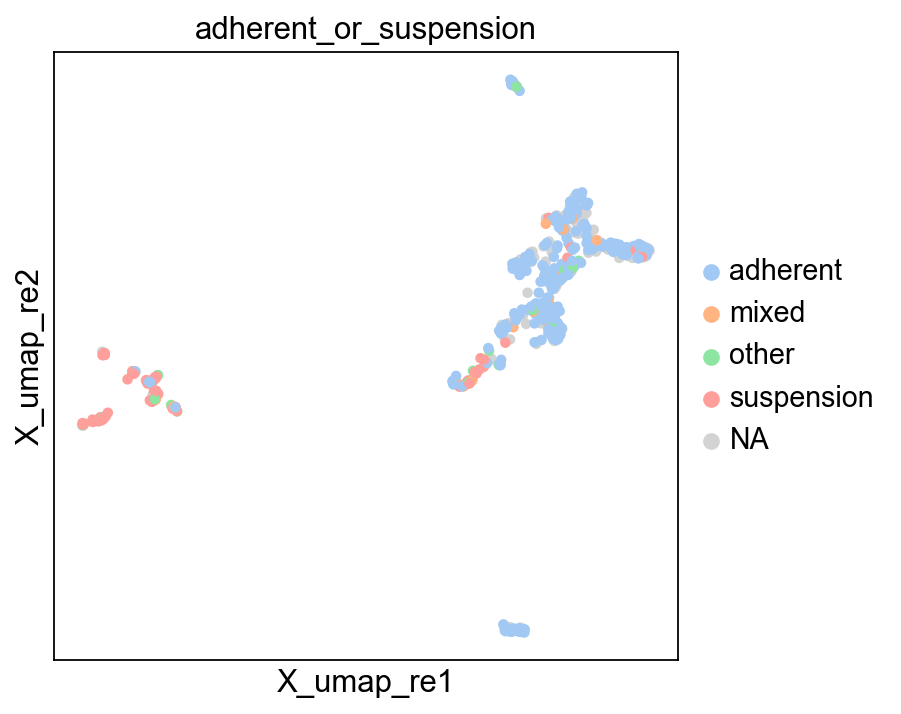

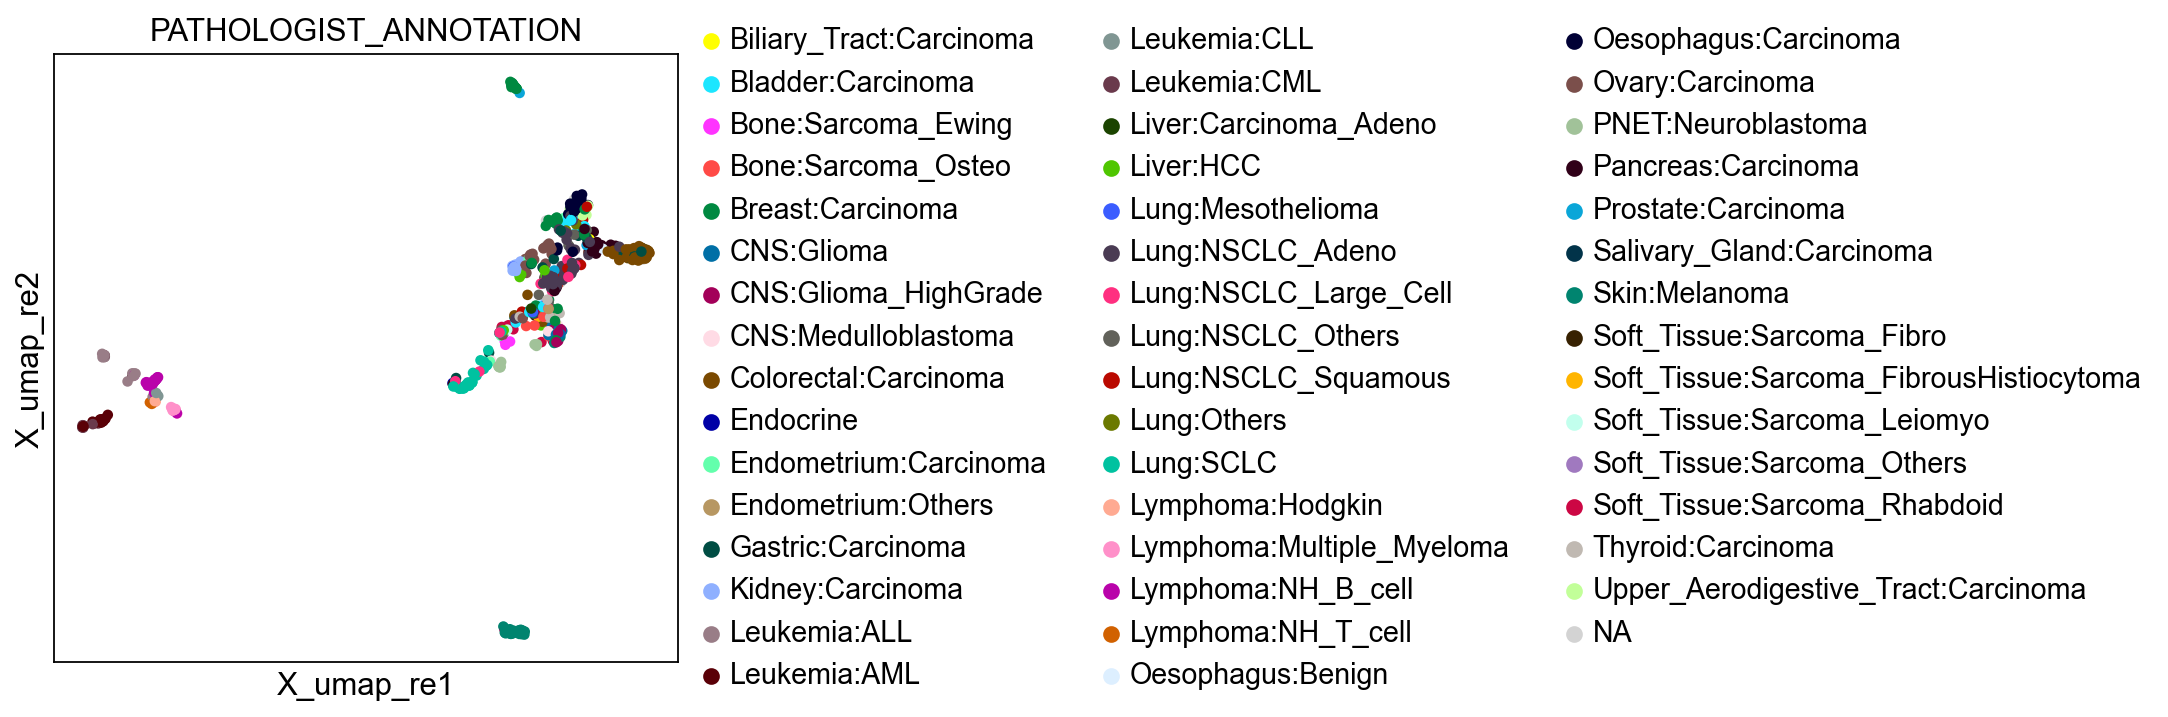

In [14]:
#running UMAP with default parameters

adata_tmp = reduce_simple(adata,n_components=2,min_dist=0.1,n_neighbors=15,hvgs=None)
sc.pl.embedding(adata_tmp,basis="X_umap_re",color="leiden_high_dimensional",size=90,projection="2d",)
sc.pl.embedding(adata_tmp,basis="X_umap_re",color='type',size=90,projection="2d",)
sc.pl.embedding(adata_tmp,basis="X_umap_re",color='Histology',size=90,projection="2d",)
sc.pl.embedding(adata_tmp,basis="X_umap_re",color='Site_Primary',size=90,projection="2d",)
sc.pl.embedding(adata_tmp,basis="X_umap_re",color='tcga_code',size=90,projection="2d",)
sc.pl.embedding(adata_tmp,basis="X_umap_re",color='adherent_or_suspension',size=90,projection="2d",)
sc.pl.embedding(adata_tmp,basis="X_umap_re",color='PATHOLOGIST_ANNOTATION',size=90,projection="2d",)

In [15]:
adata_tmp

AnnData object with n_obs × n_vars = 560 × 47269
    obs: 'CCLE_ID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1', 'Site_Subtype2', 'Histology', 'Hist_Subtype1', 'Hist_Subtype2', 'Gender', 'Age', 'Race', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease', 'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium', 'Freezing.Medium', 'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type', 'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code', 'adherent_or_suspension', 'leiden_high_dimensional', 'leiden_umap'
    var: 'n_cells', 'DeepCDR_Oncogene', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'hvg', 'neighbors', 'leiden', 'leiden_high_dimensional_colors', 'type_colors', 'Histology_colors', 'Site_Primary_colors', 'tcga_code_colors', 'adherent_or_suspension_colors', 'PATHOLOGIST_ANNOTATION_colors'
    obsm: 'X_umap_re'
    obsp: 'distances', 'connectivities'

In [16]:
#function to check wether a column is a category rather than individual cell line annoations of the cells
#at least median 2 counts per category
def check_category(adata,c,cutoff):
    g = adata.obs.groupby(c).agg({"CCLE_ID":"count"})
    median= np.median(g.values.flatten())
    return median>=cutoff or adata.obs[c].dtype == "float64"

## Check for default parameters and no HVG subsampling how the variance in the data is explained

In [17]:
#running PCR on all qualified columns (that are categories rather than annotations) and plotting
def eval_and_plot(adata_tmp):
    sb.set_palette("pastel")
    sb.set(rc={'figure.figsize':(10,7)})
    list_pcr=[]
    for c in adata_tmp.obs.columns:
        if check_category(adata_tmp,c,2): 
            no_na = adata_tmp.obs[c].dropna().index
            pcr_high_dimensional = metrics.pc_regression(adata_tmp[no_na].X,covariate=adata_tmp[no_na].obs[c])
            pcr_umap = metrics.pc_regression(adata_tmp[no_na].obsm["X_umap_re"],covariate=adata_tmp[no_na].obs[c])
            list_pcr.append((c,pcr_high_dimensional,pcr_umap,(len(no_na)/len(adata_tmp.obs))*100))
    PCR_values = pd.DataFrame(list_pcr,columns=["column","pcr_high_dimensional","pcr_umap","%observations"])#make the score a dataframe
    np.round(PCR_values.sort_values("pcr_high_dimensional",ascending=False),4)
    PCR_values = PCR_values.loc[~PCR_values.column.isin(["leiden_high_dimensional","leiden_umap"])]#remove leiden columns as not informative
    PCR_values["delta"] = PCR_values["pcr_umap"] - PCR_values["pcr_high_dimensional"] #calculate change between 
    PCR_values = np.round(PCR_values.sort_values(["delta"],ascending=False),4)
    melted_PCR = pd.melt(PCR_values,id_vars=["column"],value_vars = ["pcr_high_dimensional","pcr_umap"])
    
    #plot 1
    sb.barplot(
        data=melted_PCR,x="column",y="value",hue="variable",palette={"pcr_high_dimensional":sb.color_palette("pastel")[4],"pcr_umap":sb.color_palette("dark")[4]}
    )
    plt.xticks(rotation=90,fontsize=15)
    plt.ylabel("variance explained",fontsize=20)
    plt.xlabel("Annotation column",fontsize=20)
    plt.title("Principal Component Regression: counts vs. UMAP",fontsize=20)
    plt.ylim(0,1)
    plt.show()
    #plot2
    
    sb.barplot(
        data=PCR_values.sort_values("pcr_high_dimensional",ascending=False),x="column",y="pcr_high_dimensional")
    plt.xticks(rotation=90,fontsize=15)
    plt.ylabel("variance explained",fontsize=20)
    plt.xlabel("Annotation column",fontsize=20)
    plt.title("Principal Component Regression: Variance in the high dimensional embedding",fontsize=20)
    plt.show()
    #plot3

    sb.barplot(
        data=PCR_values,x="column",y="delta")
    plt.xticks(rotation=90,fontsize=15)
    plt.ylabel("delta variance explained",fontsize=20)
    plt.xlabel("Annotation column",fontsize=20)
    plt.title("Changes in explained variance: UMAP vs. high dimensional data",fontsize=20)
    #plt.ylim(0,1)
    plt.show()
    return PCR_values, melted_PCR

## Default settings

In [ ]:
adata_tmp = reduce_simple(adata)

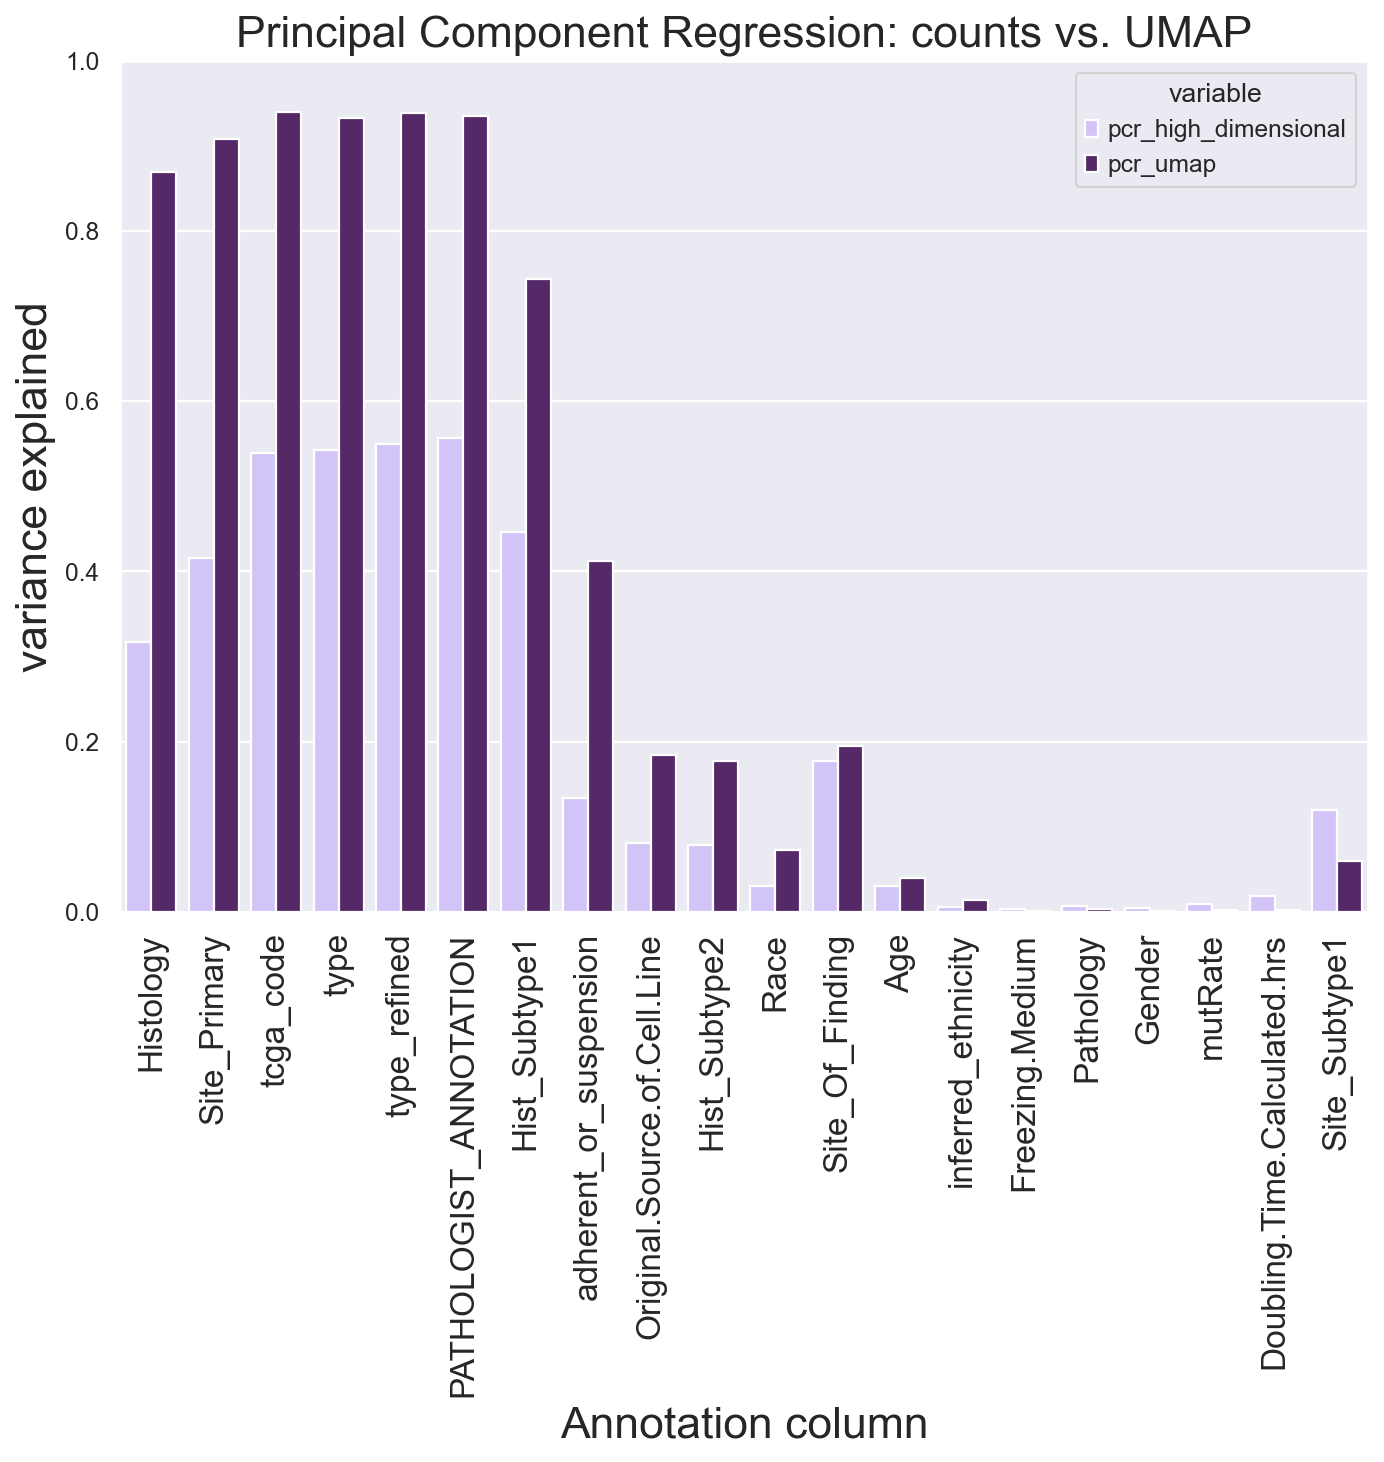

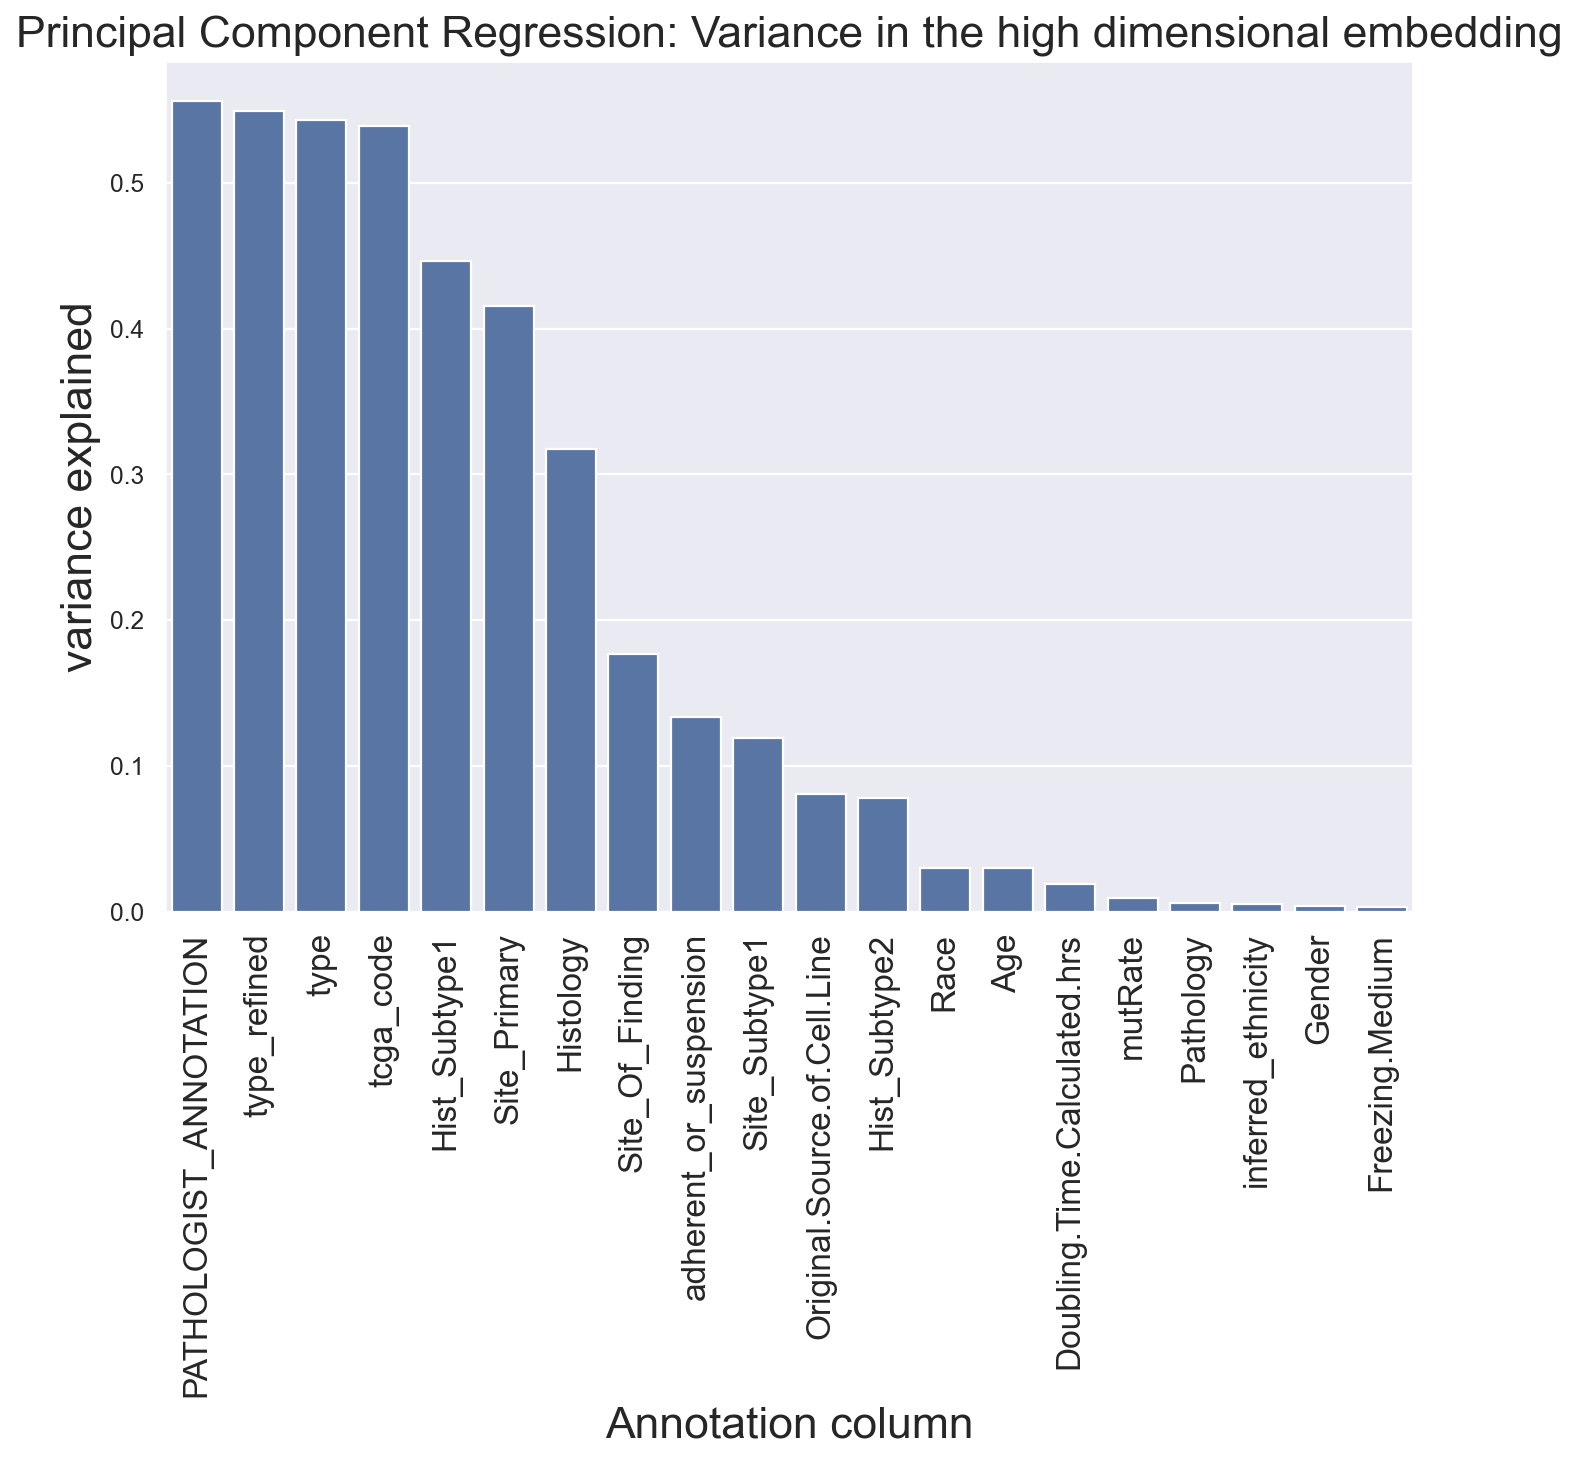

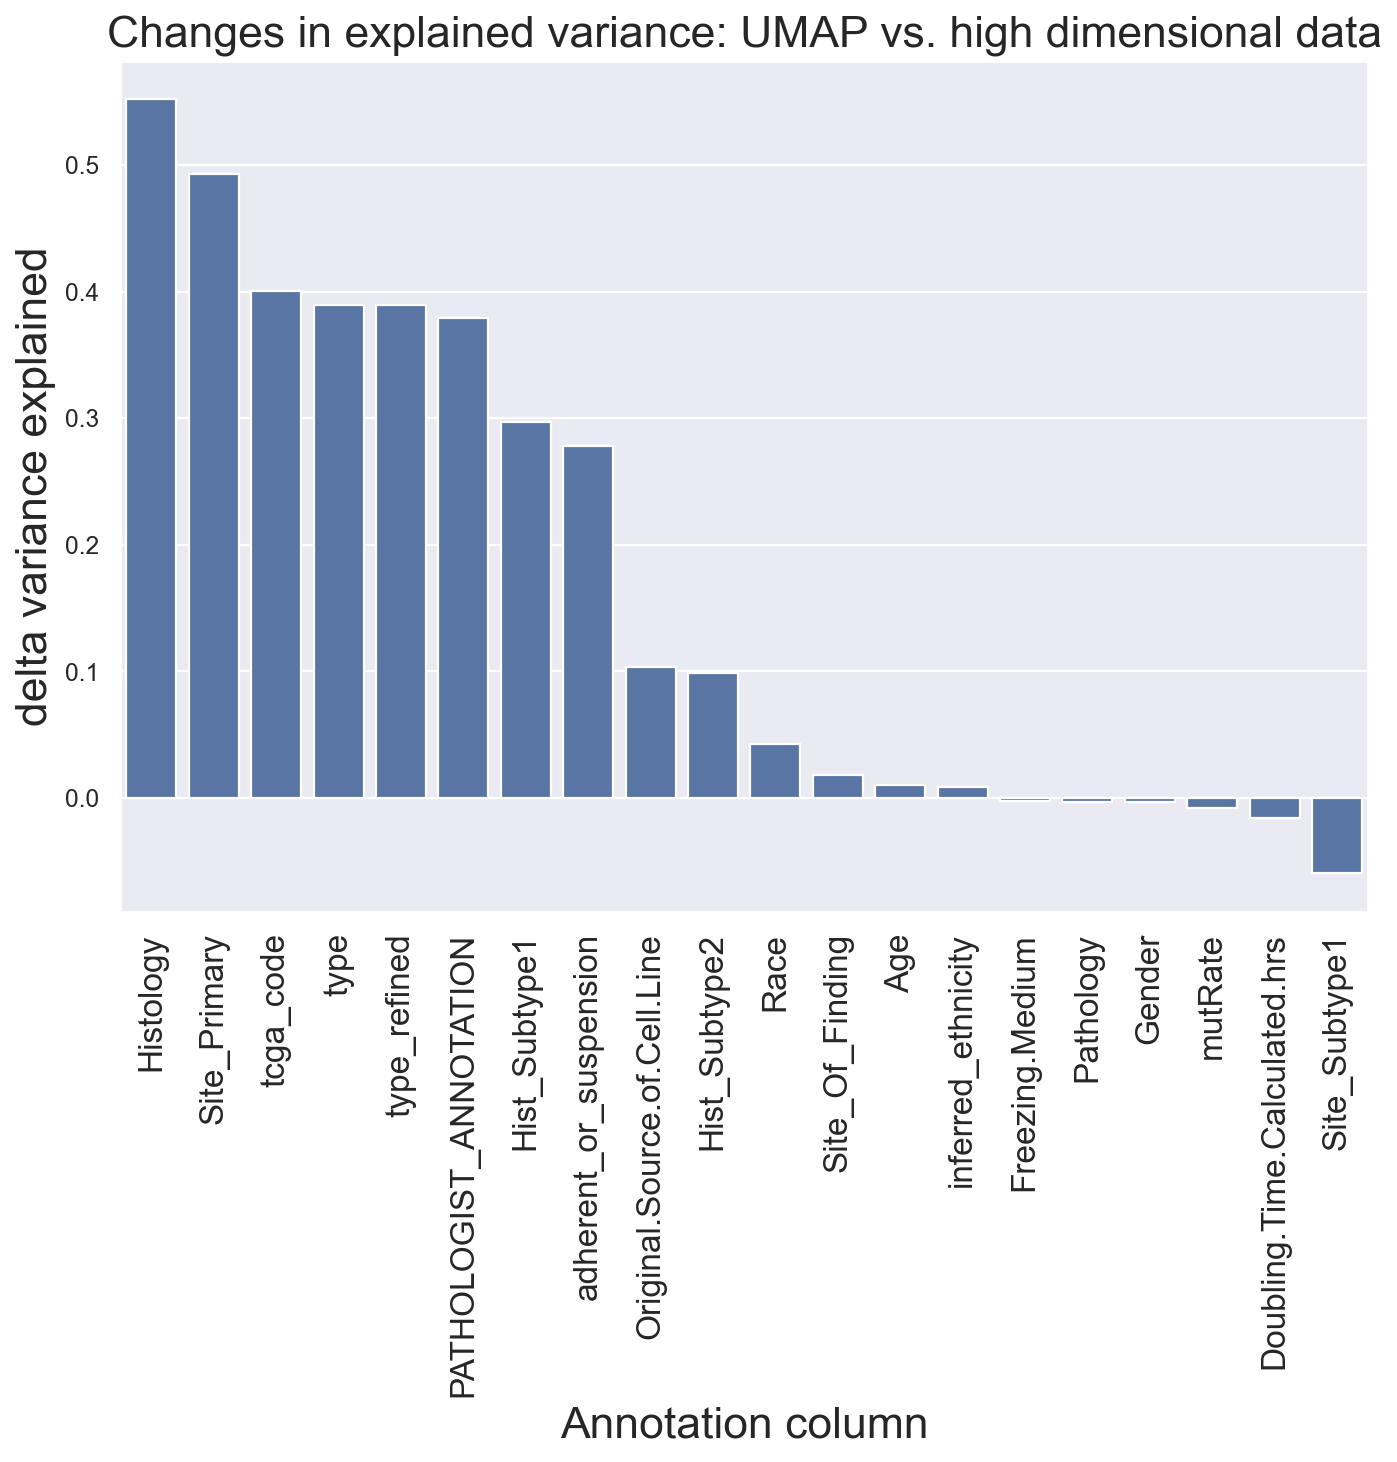

In [20]:
val_def,melt_def = eval_and_plot(adata_tmp)

## Only oncogenes

In [25]:
adata_onc = adata[:,adata.var.DeepCDR_Oncogene].copy()

In [ ]:
adata_onc = reduce_simple(adata_onc,n_components=2,min_dist=0.1,n_neighbors=15,hvgs=None)


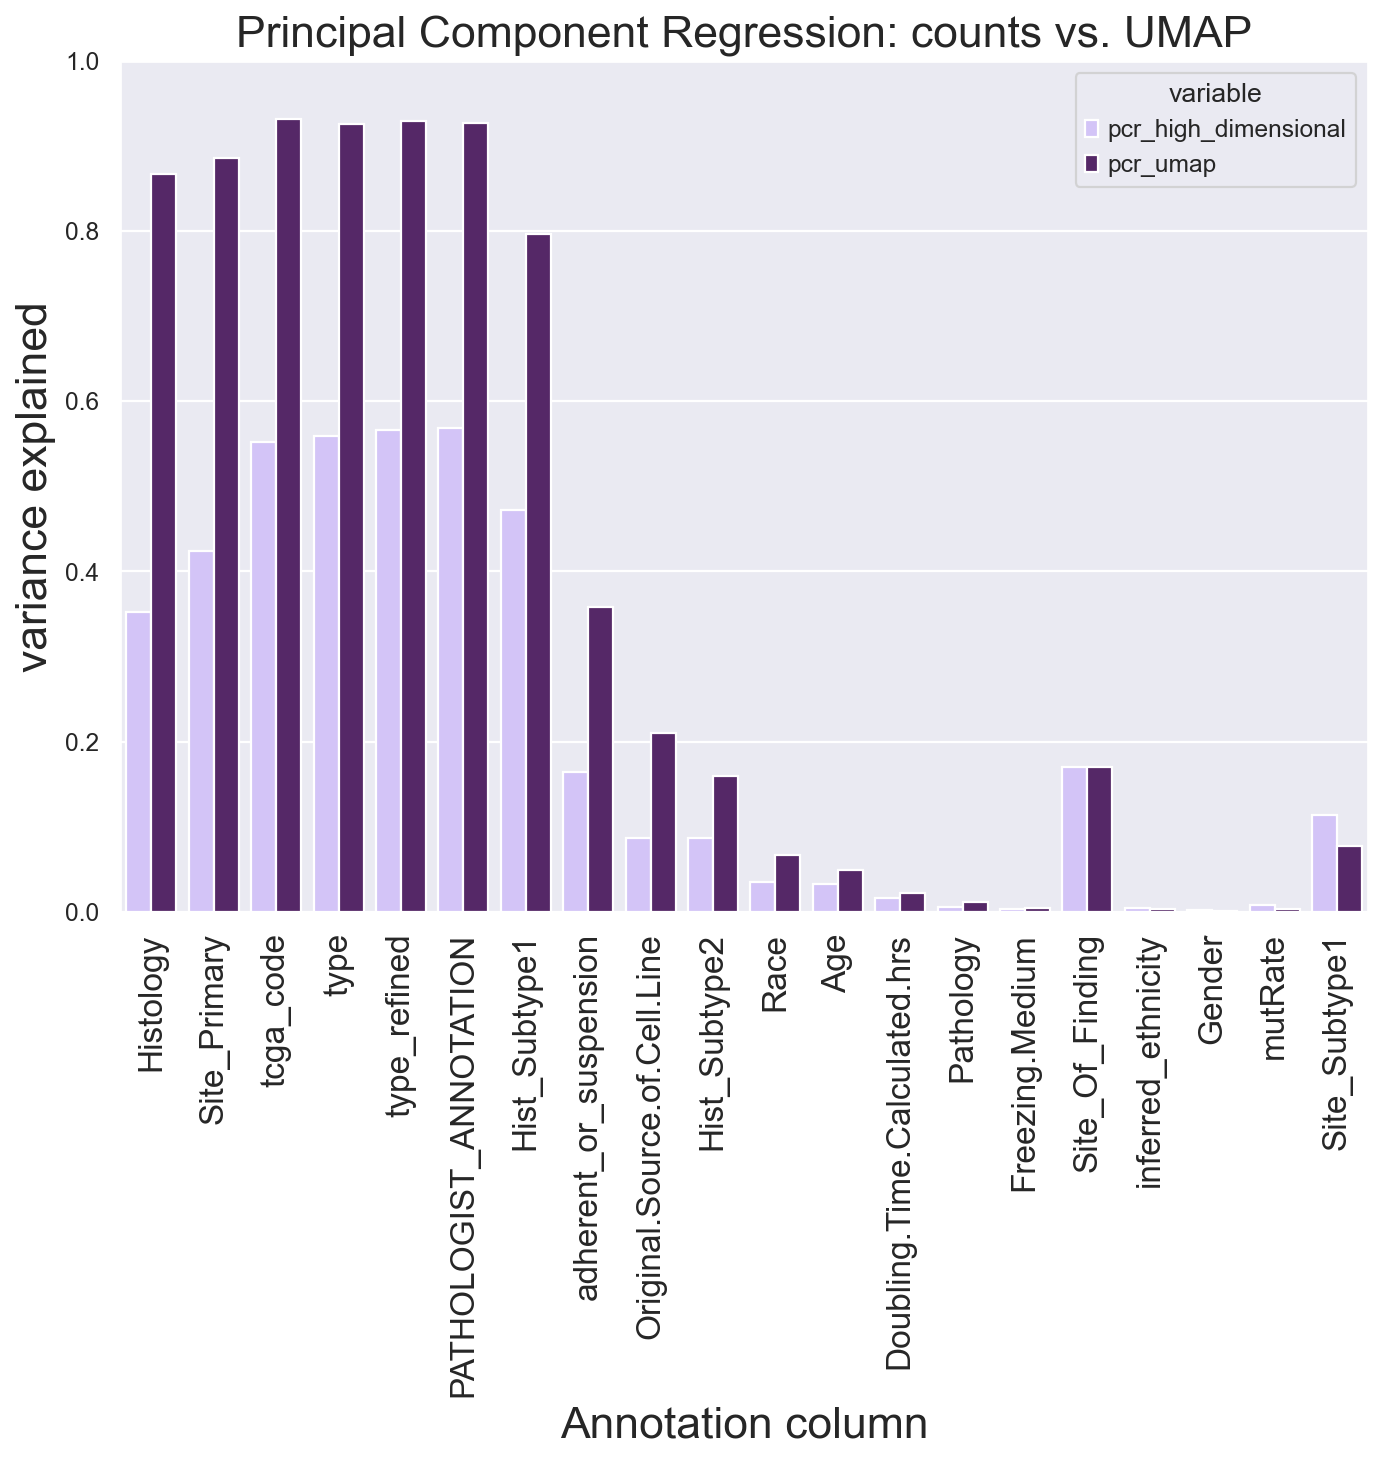

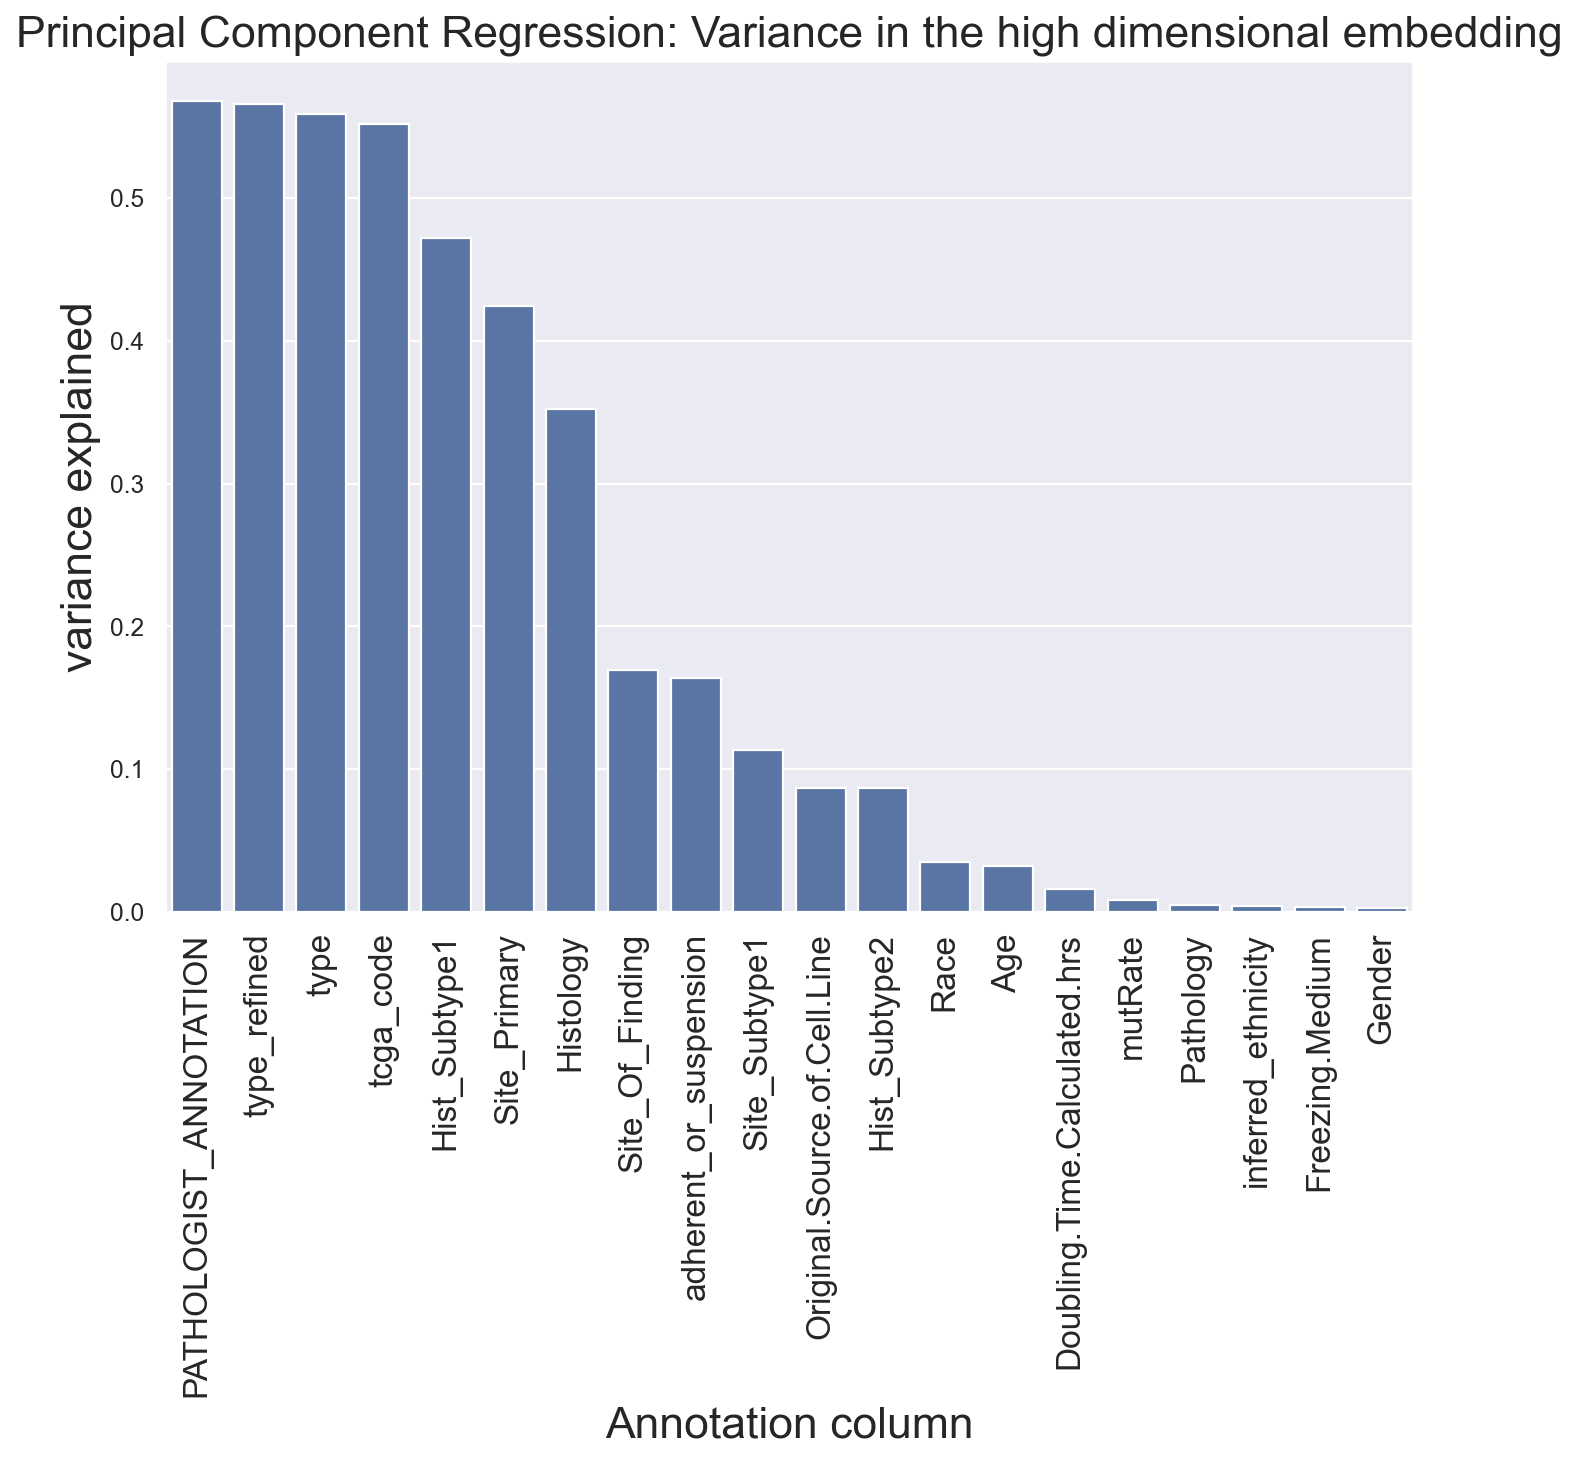

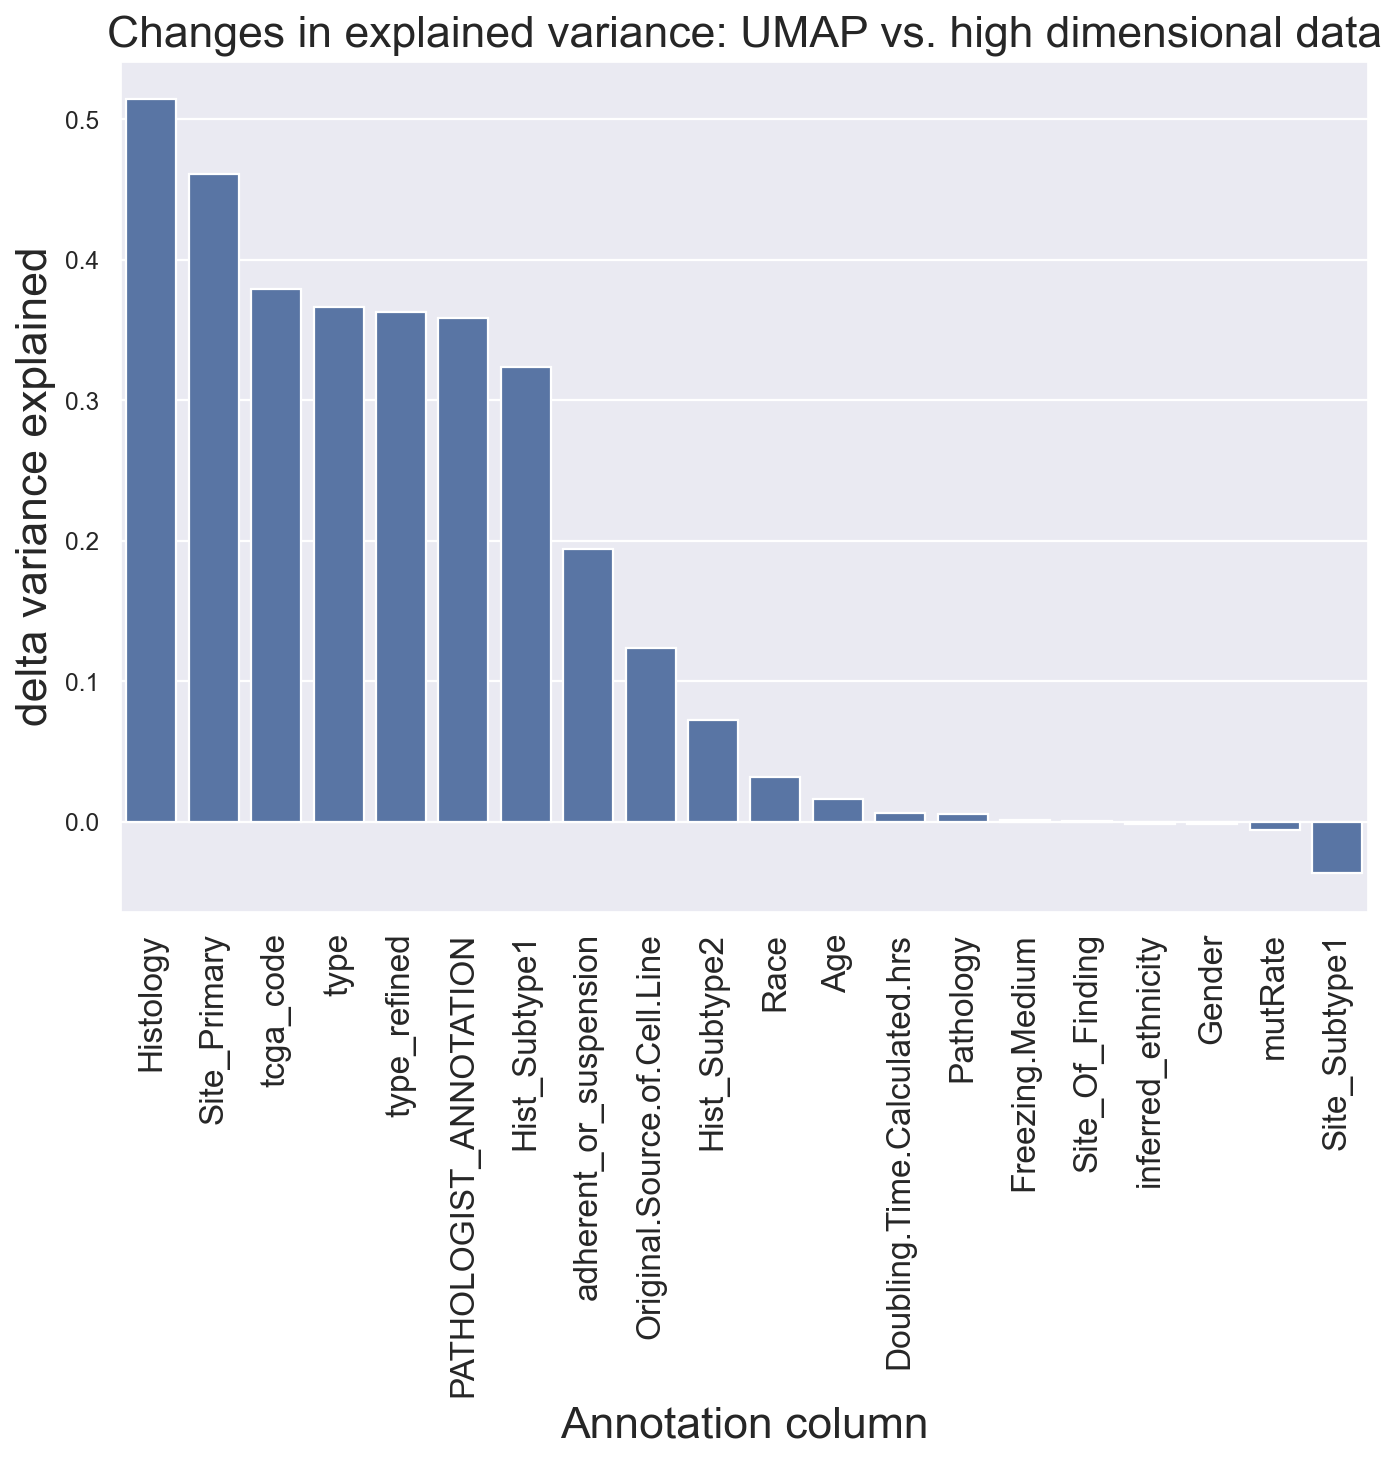

In [27]:
val_onc,melt_onc = eval_and_plot(adata_onc)

## compare onc, hvg and default

In [28]:
#put annotations for each category
val_def["subset"]="full"
val_onc["subset"]="original geneset"
#conat the methods output that meaures variance contributed per column
val_all=pd.concat([val_def,val_onc])#,val_hvg])#val_tiny]

In [30]:
#save for later use
val_all.to_csv("all_values_pcr.csv")

## Explore how variable the initial input is

We want to know wether the genes initally inputted into DeepCDR lack variablity, and thus are possibly not generating enough signal for the model.

In [21]:
sc.pp.highly_variable_genes(adata,n_top_genes=5000)

In [22]:
#get minimal dispersion to be considered top 5000 HVG
min_disp = adata[:,adata.var.highly_variable].var.dispersions_norm.min()

In [23]:
min_disp 

1.3965393

In [30]:
adata

AnnData object with n_obs × n_vars = 560 × 47269
    obs: 'CCLE_ID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1', 'Site_Subtype2', 'Histology', 'Hist_Subtype1', 'Hist_Subtype2', 'Gender', 'Age', 'Race', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease', 'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium', 'Freezing.Medium', 'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type', 'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code', 'adherent_or_suspension', 'leiden_high_dimensional', 'leiden_umap'
    var: 'n_cells', 'DeepCDR_Oncogene', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'hvg', 'neighbors', 'leiden', 'leiden_high_dimensional_colors', 'type_colors', 'PATHOLOGIST_ANNOTATION_colors', 'Site_Primary_colors', 'Histology_colors', 'tcga_code_colors', 'adherent_or_suspension_colors'
    obsm: 'X_umap_re'
    obsp: 'distances', 'connectivities'

In [24]:
sb.set(rc={'figure.figsize':(5,5)})

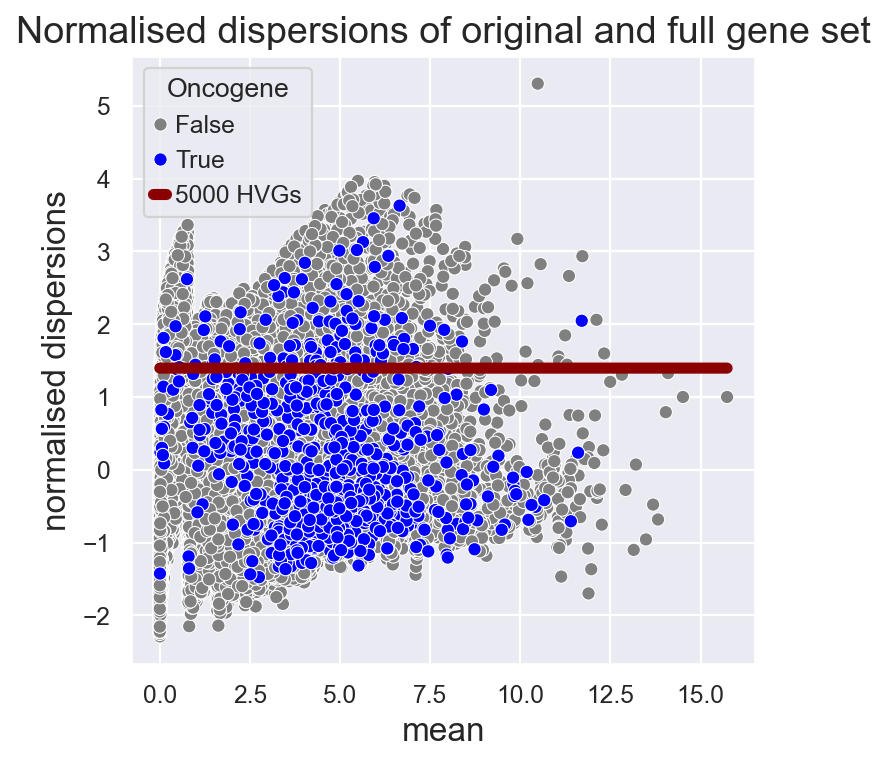

In [55]:
sb.scatterplot(data=adata.var.sort_values("DeepCDR_Oncogene"),x="means",y="dispersions_norm",hue="DeepCDR_Oncogene",palette={False:"gray",True:"Blue"})

sb.lineplot(x = adata.var.means, y=[min_disp]*len(adata.var.means),linewidth=5,label="5000 HVGs",color="darkred")
plt.legend(title='Oncogene', loc='upper left')
plt.xlabel("mean",size=15)
plt.ylabel("normalised dispersions",size=15)
plt.title("Normalised dispersions of original and full gene set",size=17)
plt.show()

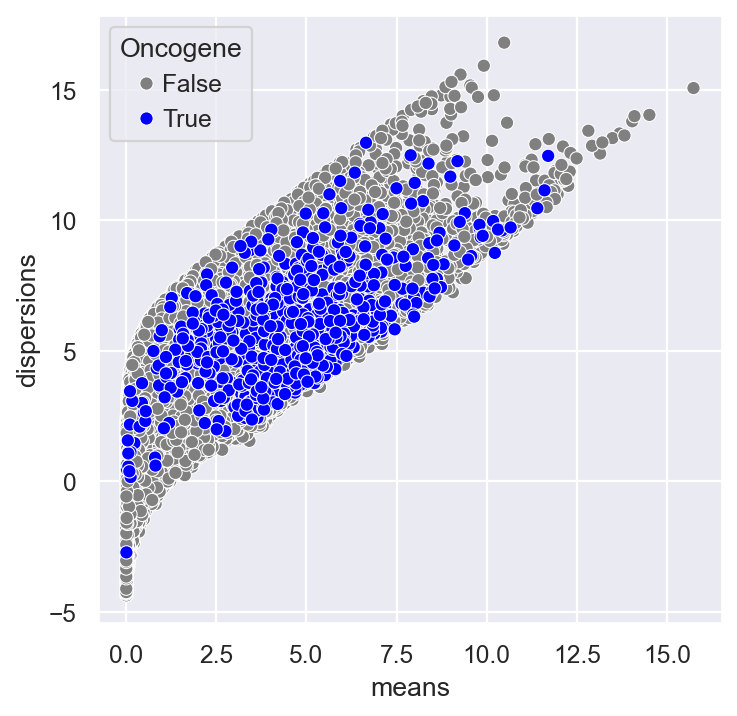

In [29]:
sb.scatterplot(data=adata.var.sort_values("DeepCDR_Oncogene"),x="means",y="dispersions",hue="DeepCDR_Oncogene",palette={False:"gray",True:"Blue"})
#sb.lineplot(x = adata.var.means, y=[min_disp]*len(adata.var.means),linewidth=5,label="5000 HVGs",color="darkred")
plt.legend(title='Oncogene', loc='upper left')
plt.show()

In [44]:
adata

AnnData object with n_obs × n_vars = 560 × 47269
    obs: 'CCLE_ID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1', 'Site_Subtype2', 'Histology', 'Hist_Subtype1', 'Hist_Subtype2', 'Gender', 'Age', 'Race', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease', 'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium', 'Freezing.Medium', 'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type', 'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code', 'adherent_or_suspension', 'leiden_high_dimensional', 'leiden_umap'
    var: 'n_cells', 'DeepCDR_Oncogene', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'hvg', 'neighbors', 'leiden', 'leiden_high_dimensional_colors', 'type_colors', 'PATHOLOGIST_ANNOTATION_colors', 'Site_Primary_colors', 'Histology_colors', 'tcga_code_colors', 'adherent_or_suspension_colors'
    obsm: 'X_umap_re'
    obsp: 'distances', 'connectivities'

In [42]:
percent_oncogenes_covered = [(sum(adata.var.sort_values("dispersions_norm",ascending=False)[:i].DeepCDR_Oncogene)/697)*100 for i in range(0,len(adata.var),100)]
    

In [53]:
(sum(adata.var.sort_values("dispersions_norm",ascending=False)[:1000].DeepCDR_Oncogene)/697)*100

2.4390243902439024

In [57]:
(sum(adata[:,(adata.var.dispersions_norm >= -1)&(adata.var.dispersions_norm <= 1)].var.DeepCDR_Oncogene)/697)*100

70.58823529411765

Text(0.5, 1.0, 'Coverage of the original gene set by HVG cutoff')

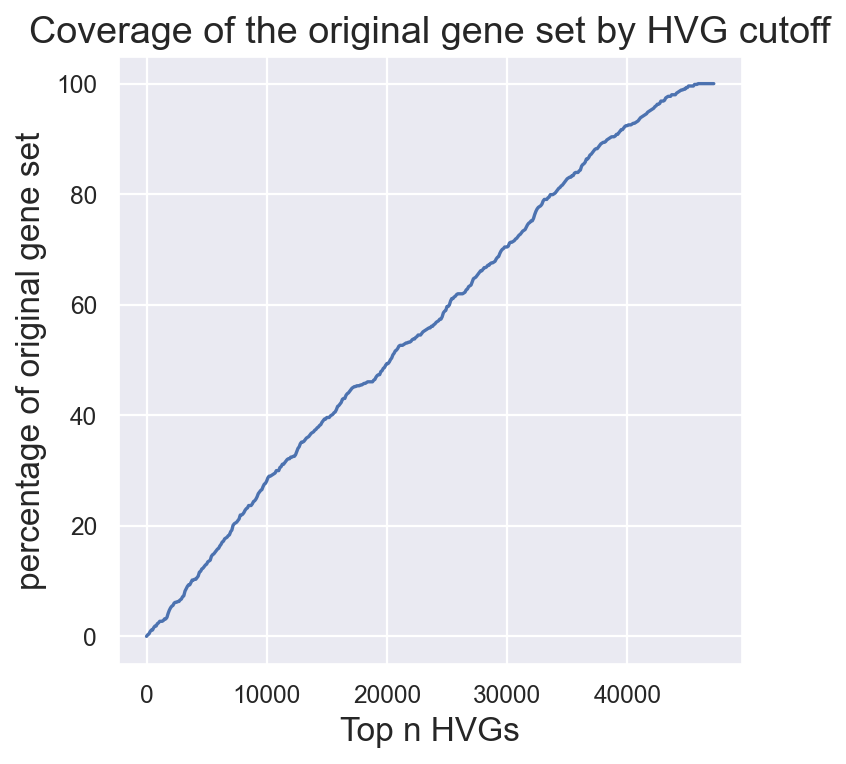

In [51]:
plt.plot(range(0,len(adata.var),100),percent_oncogenes_covered)
plt.xlabel("Top n HVGs",size=15)
plt.ylabel("percentage of original gene set",size=15)
plt.title("Coverage of the original gene set by HVG cutoff",size=17)

<Axes: xlabel='DeepCDR_Oncogene', ylabel='dispersions_norm'>

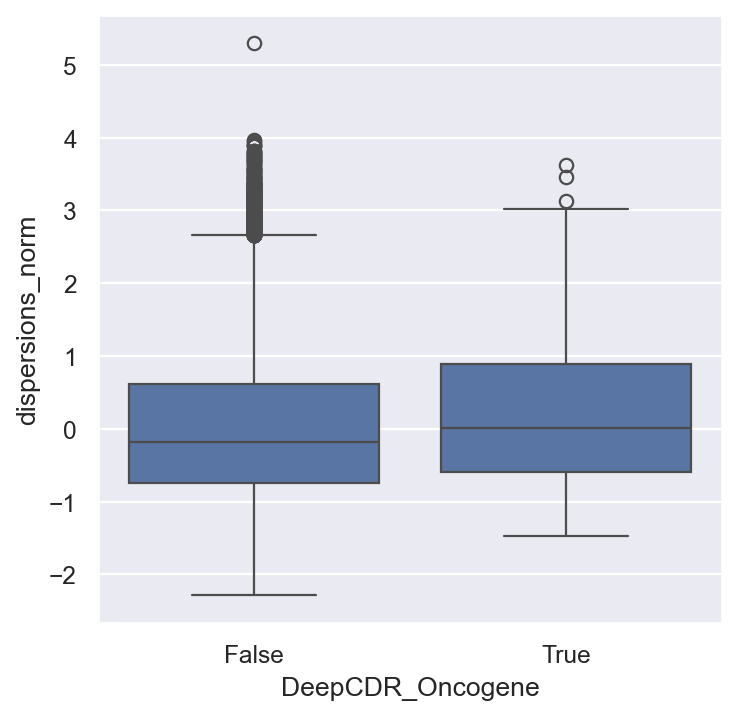

In [27]:
sb.boxplot(data=adata.var,x="DeepCDR_Oncogene",y="dispersions_norm")

## investigate correlation betwen columns

To get an idea of how much the individual columns are correlated, we calcualte a correlation matrix between the categorical varaibles using cramers contingency.

In [116]:
val_def.sort_values("pcr_high_dimensional").column

12                 Freezing.Medium
6                           Gender
9               inferred_ethnicity
0                        Pathology
17                         mutRate
13    Doubling.Time.Calculated.hrs
7                              Age
8                             Race
5                    Hist_Subtype2
11    Original.Source.of.Cell.Line
2                    Site_Subtype1
19          adherent_or_suspension
10                 Site_Of_Finding
3                        Histology
1                     Site_Primary
4                    Hist_Subtype1
18                       tcga_code
14                            type
15                    type_refined
16          PATHOLOGIST_ANNOTATION
Name: column, dtype: object

In [111]:
contingency=[]
for c1, c2 in itertools.product(val_def.order_.column,val_def.column):
    if adata.obs[c1].dtype !=  "category" or adata.obs[c2].dtype != "category":
        continue
    try:
        crosstab= pd.crosstab(index=adata.obs[c1], columns=adata.obs[c2])
        val= stats.contingency.association(crosstab)
        contingency.append((c1,c2,val))
    except:
        pass

In [112]:
contingency = pd.DataFrame(contingency,columns=["column1","column2","cramer"])

In [128]:
pivot = pd.pivot(contingency,columns="column2",index="column1")
pivot.columns = pivot.columns.droplevel(0)

<Axes: xlabel='column2', ylabel='column1'>

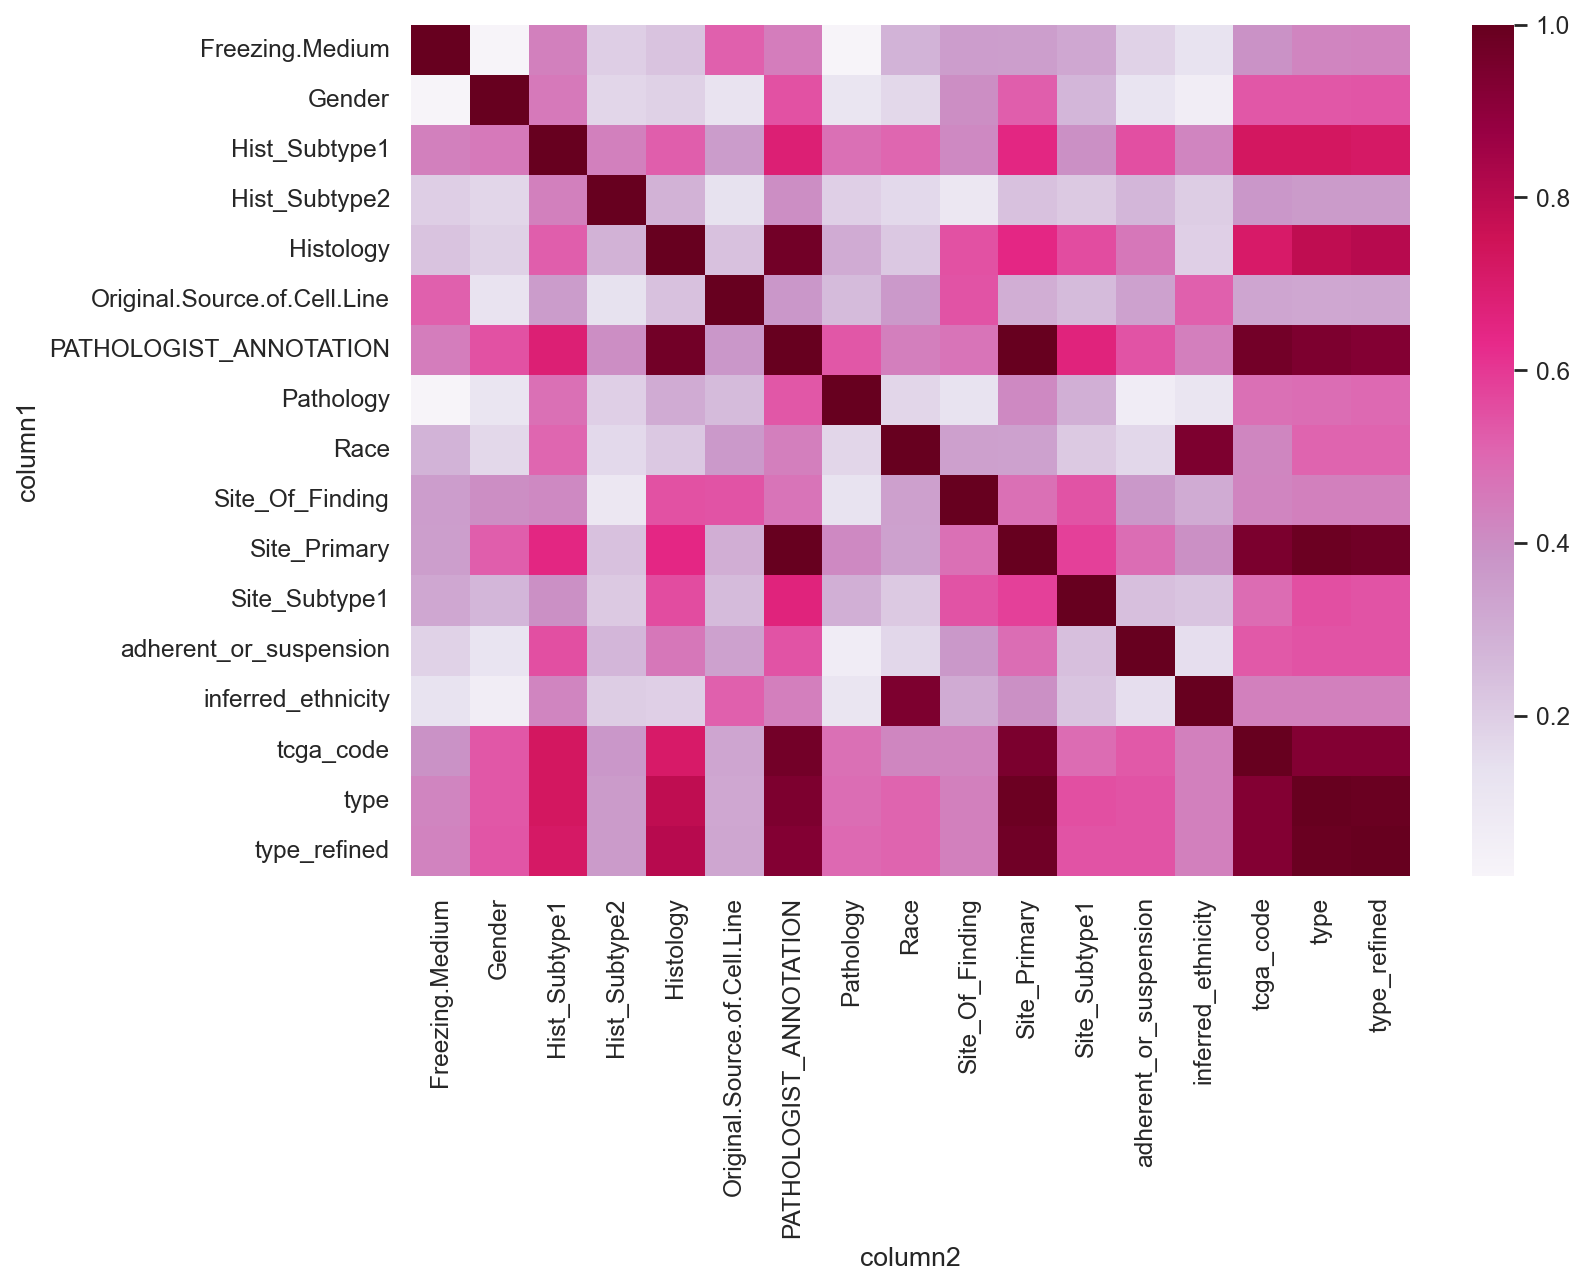

In [130]:
sb.heatmap(pivot,cmap="PuRd")